## Business Probelm
In recent years,City Hotel and Resort Hotel have been seen high Cancellation rates.Each hotel is now dealing with a number of issues as a result,including fewer revenues and less than ideal hotel room use. Consequently,lowering cancellations rates is both hotels primary goal in order to increase their effeicency in generating revenue,and for us to offer through business to adress this probelm.

In [1]:
import numpy as np                   # importing requried libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load The Data.

In [26]:
df=pd.read_csv("Hotel_Booking_Cancellation.csv")           # to see the data.

## Exploratory Data analysis and Data Cleaning.

In [27]:
df.head(5) # to see top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [28]:
df.tail(5)           #bottom 5 rows.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [29]:
df.shape  # shape of the data.

(119390, 32)

In [30]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From the given data, it is evident that the 'reservation_status_date' column should be in date format. However, it is currently stored as an object data type. Therefore, it is advisable to convert the data type from object to date to ensure accurate representation.

In [32]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Here, I am utilizing the to_datetime function in the Pandas library to convert the object data type to the datetime data type.

In [34]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [35]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*20)

hotel
['Resort Hotel' 'City Hotel']
--------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' '

Here i check all unique values in the categorical columns.

In [36]:
df.isnull().sum()   # to check null values.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [37]:
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

We can see that there are some missing values in this dataset. If we look closely, the 'agent' column has 13% missing values, and the 'company' column has a much higher 94% missing values.

In [38]:
df.drop(columns=["agent","company"],axis=1,inplace=True)        # to drop columns.

In [39]:
df.dropna(inplace=True)

I removed the 'agent' and 'company' columns since they aren't crucial for my analysis. Additionally, there are a few columns with less than 5% missing values, and I also dropped those missing values

In [40]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [41]:
df.describe()       #To check the statistical information of the columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Looking at the above description, it's evident that the 'adults', 'children', 'babies', and 'adr' columns contain some outliers. 

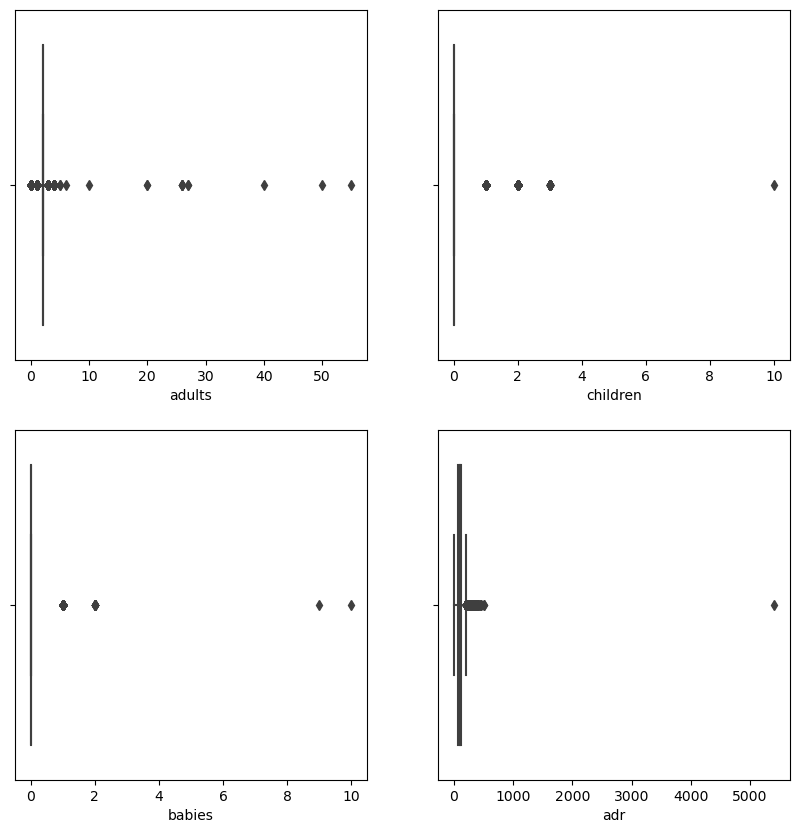

In [43]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(ax=axes[0,0],data=df,x="adults")
sns.boxplot(ax=axes[0,1],data=df,x="children")
sns.boxplot(ax=axes[1,0],data=df,x="babies")
sns.boxplot(ax=axes[1,1],data=df,x="adr")
plt.show()

For visualizing outliers, I plotted a boxplot.

In [44]:
df.babies.value_counts()

0     117984
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

In [45]:
df[df.babies>=9].index

Int64Index([46619, 78656], dtype='int64')

In [46]:
df.drop(df[df.babies>=9].index,inplace=True)

In [47]:
df.adults.value_counts()

2     89494
1     22734
3      6197
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [48]:
df[df.adults>35].index

Int64Index([1539, 1643, 2173], dtype='int64')

In [49]:
df.drop(df[df.adults>35].index,inplace=True)

In [50]:
df.children.value_counts()

0.0     110314
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

In [51]:
df[df.children>5].index

Int64Index([328], dtype='int64')

In [52]:
df.drop(df[df.children>5].index,inplace=True)

In [53]:
df.adr.value_counts()

62.00     3753
75.00     2710
90.00     2471
65.00     2397
0.00      1935
          ... 
96.09        1
48.03        1
89.43        1
63.07        1
157.71       1
Name: adr, Length: 8869, dtype: int64

In [54]:
df[df.adr>5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [55]:
df[df.adr>5000].index

Int64Index([48515], dtype='int64')

In [56]:
df.drop(df[df.adr>5000].index,inplace=True)

In [57]:
df.shape

(118891, 30)

After removing outliers, this is the shape of our data

## Data Visualizations.

In [58]:
Cancelled_pern=df["is_canceled"].value_counts(normalize=True)
Cancelled_pern

0    0.628668
1    0.371332
Name: is_canceled, dtype: float64

<BarContainer object of 2 artists>

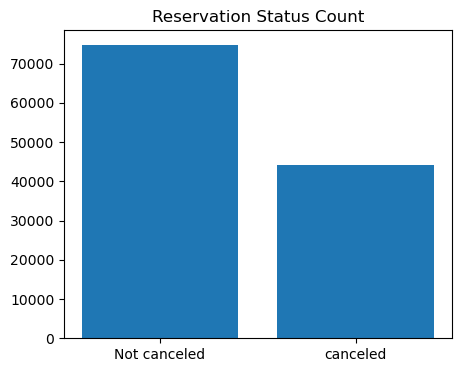

In [59]:
plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(["Not canceled","canceled"],df["is_canceled"].value_counts())

The accompanying bar graph shows the percentage of reservations that are canceled and those that are not.It is obivious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation,which has a significant impact on the hotels earnings.

In [60]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

0    0.720322
1    0.279678
Name: is_canceled, dtype: float64

In [61]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582908
1    0.417092
Name: is_canceled, dtype: float64

Text(0, 0.5, 'no.of reservations')

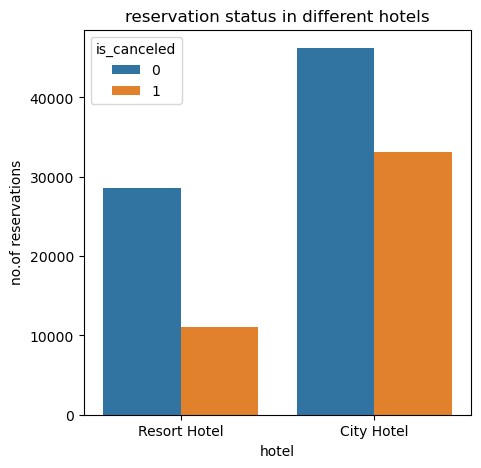

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="hotel",hue="is_canceled")
plt.title("reservation status in different hotels")
plt.xlabel("hotel")
plt.ylabel("no.of reservations")

In comparison to resort hotels,city hotels have more bookings.it's possible that resort hotels more expensive than those in cities.

In [63]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

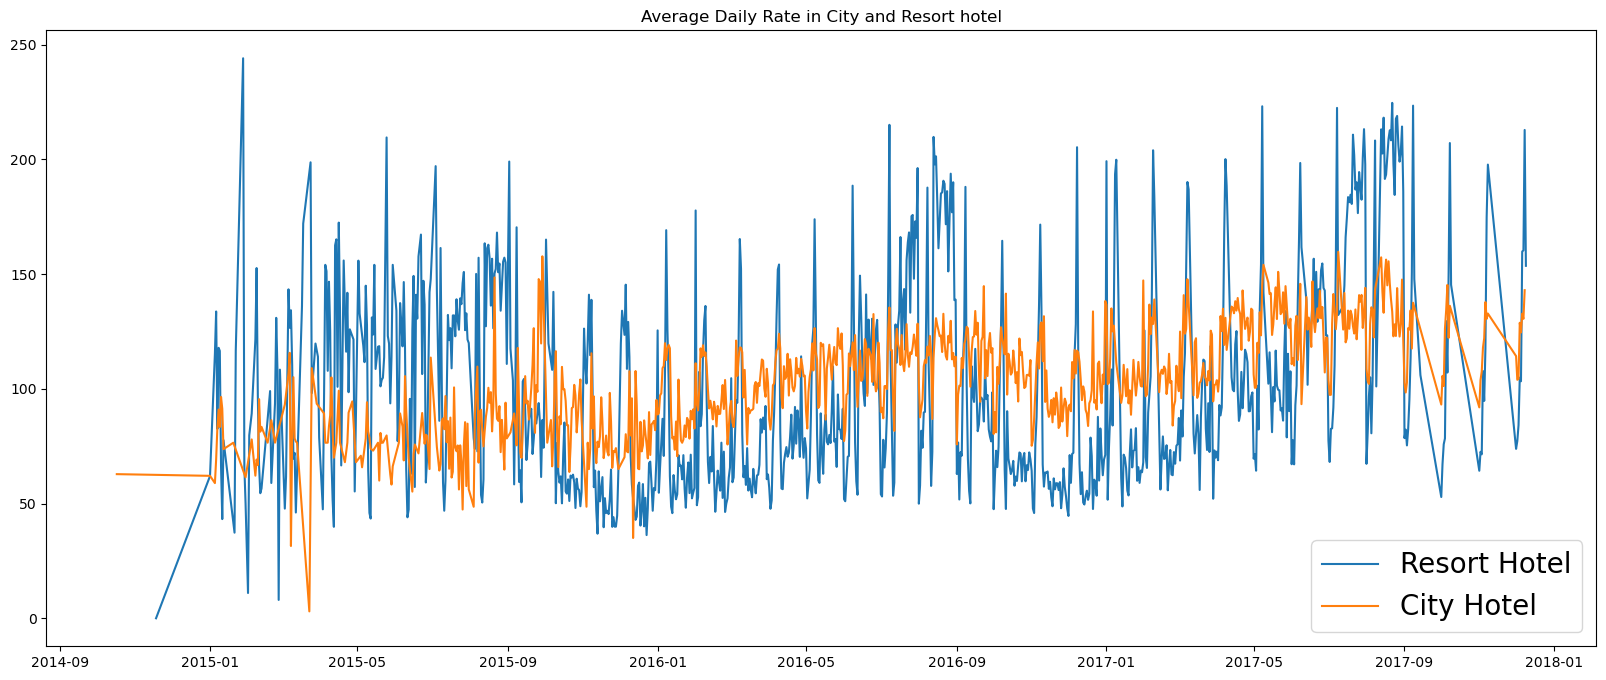

In [64]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort hotel")
plt.plot(resort_hotel.index,resort_hotel["adr"],label="Resort Hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label="City Hotel")
plt.legend(fontsize=20)
plt.show()

The line graph above shows that,on certain days,the average daily rate for a city hotel is less than that of a resort hotel,and on other days,it is even less. It goes without saying that weekends and hoildays may see a rise in resort hotel rates.

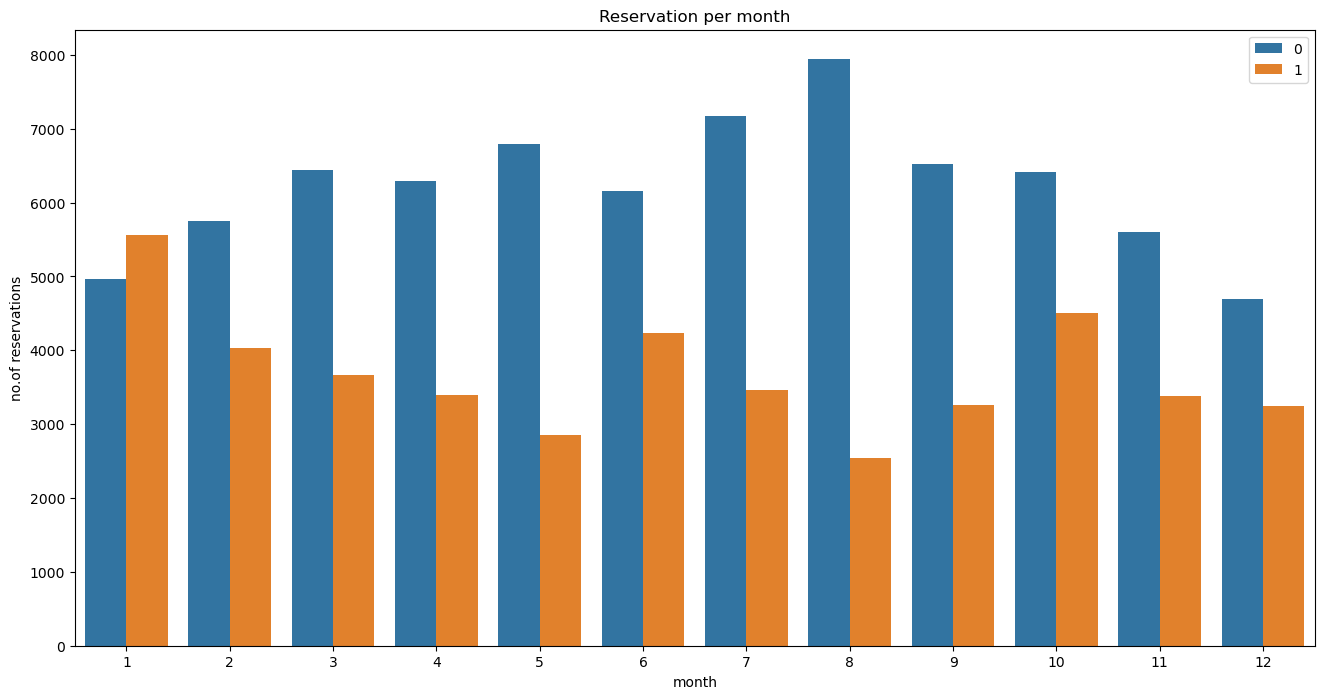

In [65]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x="month",hue="is_canceled",data=df)
plt.title("Reservation per month")
plt.xlabel("month")
plt.ylabel("no.of reservations")
plt.legend()
plt.show()

We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen, both the no.of confirmed reservations and the no.of canceled reservations are largest in the month of august. whereas january is the month with the most canceled reservations.

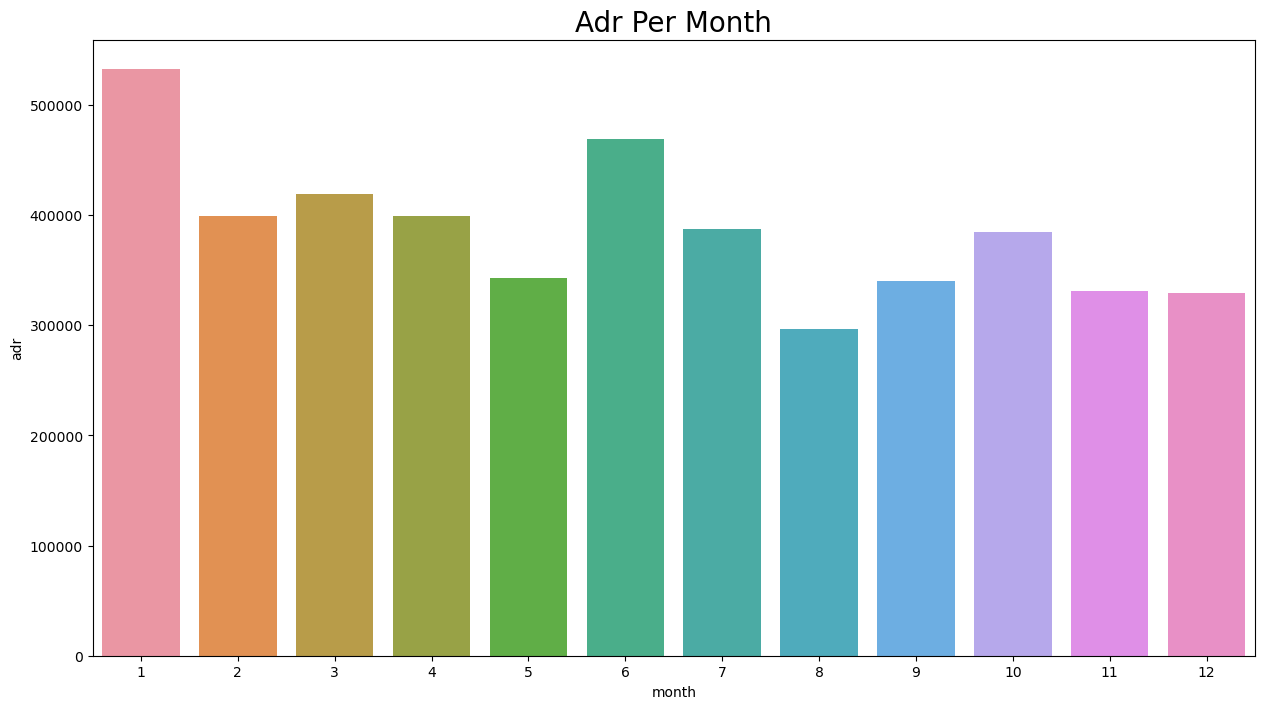

In [66]:
plt.figure(figsize=(15,8))
plt.title("Adr Per Month",fontsize=20)
sns.barplot(x="month",y="adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())
plt.show()

This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. therefore,the cost of the accomdation is solely responsible for the cancellattion.

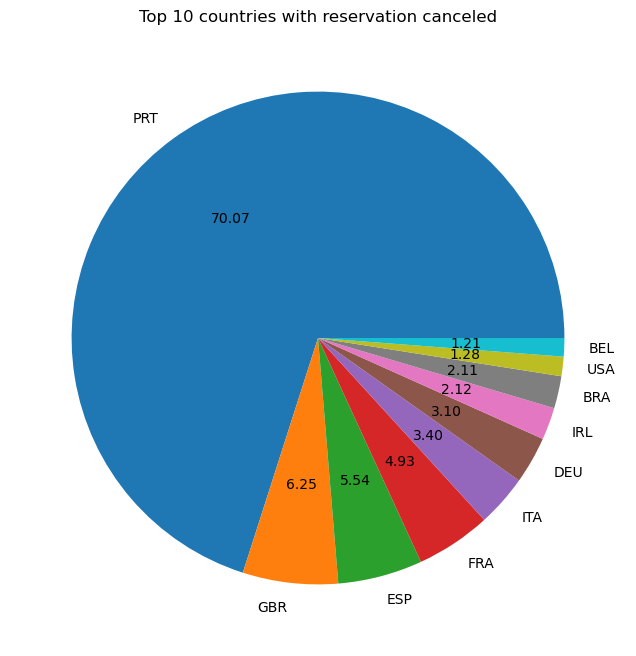

In [219]:
cancelled_data=df[df["is_canceled"]==1]
top_10_countries=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with reservation canceled")
plt.pie(top_10_countries,autopct="%.2f",labels=top_10_countries.index)
plt.show()

portugal is the top country with highest number of cancellations.

In [221]:
df["market_segment"].value_counts(normalize=True)

Online TA        0.474393
Offline TA/TO    0.203195
Groups           0.166590
Direct           0.104676
Corporate        0.042981
Complementary    0.006174
Aviation         0.001993
Name: market_segment, dtype: float64

In [222]:
cancelled_data["market_segment"].value_counts(normalize=True)

Online TA        0.469738
Groups           0.274010
Offline TA/TO    0.187460
Direct           0.043422
Corporate        0.022153
Complementary    0.002039
Aviation         0.001178
Name: market_segment, dtype: float64

Around 46% of the clients come from online travel agencies,whereas 27% come from groups.Only 4% of clients book hotels directly by visiting them and making reservations.

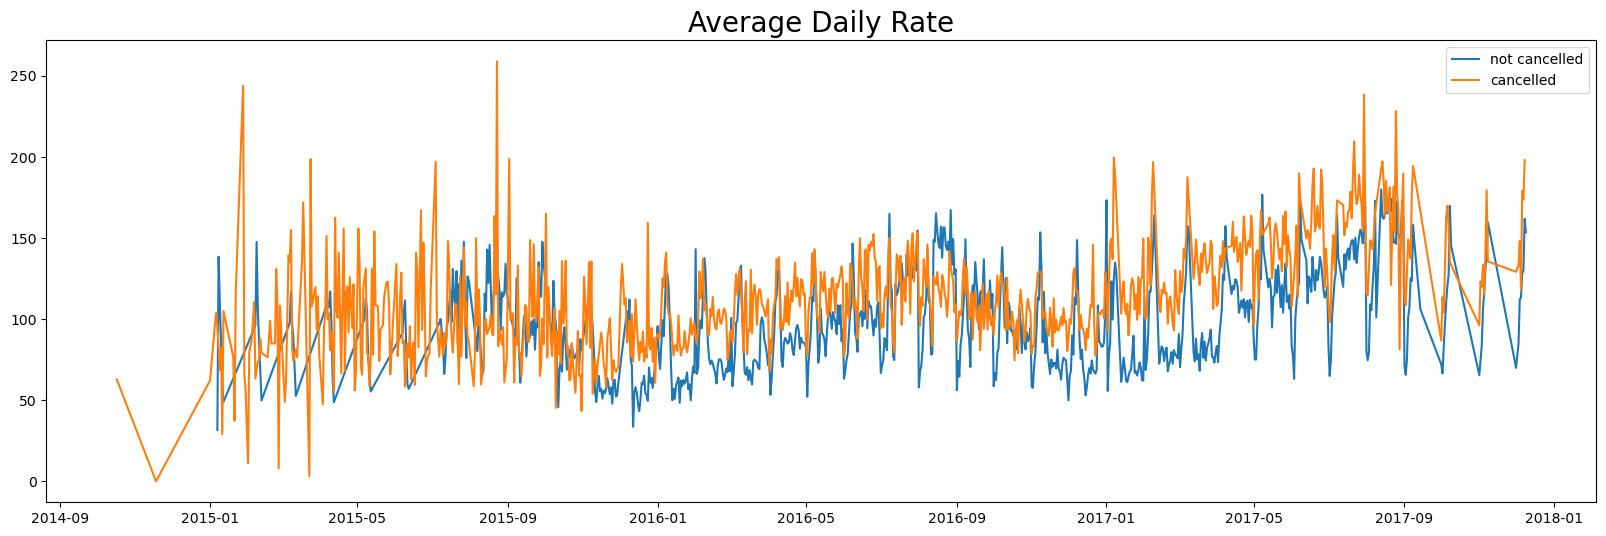

In [226]:
cancelled_df_adr=cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

not_cancelled_data=df[df["is_canceled"]==0]

not_cancelled_df_adr=not_cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate",fontsize=20)
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"],label="not cancelled")
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"],label="cancelled")
plt.legend()
plt.show()

As seen in the graph,reservations are canceled when the averages daily rate is higher than when it is not canceled.it clearly proves all the above analysis,that the higher price leads to higher cancellations.

# SUGGESTIONS.
    1.Cancellation rates rise as the price does.In order to prevent cancellations of reservations,hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations.They can also provide some discounts to the consumers.
    
    2. As the ratio of cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on hoildays